# Loan Approval AI 
### O obejtivo deste codigo é desenvolver um modelo de IA capaz determinar a elegibilidade de indivíduos ou organizações para obter empréstimos de uma instituição de crédito, atraves de dados como, renda, grau de escolaridade, pontuação de crédito entre outros. 

In [3]:
# Importando as bibliotecas necessarias 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf

2024-10-09 21:33:45.418324: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-09 21:33:45.429204: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-09 21:33:45.441885: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-09 21:33:45.445204: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-09 21:33:45.455274: I tensorflow/core/platform/cpu_feature_guar

# Carregar dataset
### Para o projeto foi escolhido um dataset de aprovação de empréstimo, que é um arquivo .csv que contém uma coleção de registros financeiros e informações associadas usadas para determinar a elegibilidade de indivíduos ou organizações para obter empréstimos de uma instituição de crédito. Ele inclui vários fatores, como pontuação cibil, renda, status de emprego, prazo do empréstimo, valor do empréstimo, valor dos ativos e status do empréstimo. Este conjunto de dados é comumente usado em aprendizado de máquina e análise de dados para desenvolver modelos e algoritmos que preveem a probabilidade de aprovação de empréstimo com base nos recursos fornecidos.

O dataset utilizado esta disponivel no Kaggle, e pode ser acessado pelo link: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

In [2]:
# Carregar os dados
dados = pd.read_csv('loan_approval_dataset.csv')

# Pré-processamento dos Dados

## Remoção de colunas que não possuem relevância

In [3]:
# Removendo a coluna loan_id, pois é apenas um identificador
dados_preprocessados = dados.drop('loan_id', axis=1)

## Codificando colunas de dados categórticos
### Para este processo foi utilizado o LabelEncoder que é uma classe do módulo sklearn.preprocessing usada para converter rótulos categóricos em valores numéricos (inteiros).

In [4]:
# Codificar as colunas categóricas: 'education', 'self_employed', 'loan_status'

# Cada encoder foi salvo separado para usar a mesma valor numerico para os rotulos posteriormente (poderia ser feito com apenas um)
label_encoder_education = LabelEncoder() 
dados_preprocessados[' education'] = label_encoder_education.fit_transform(dados_preprocessados[' education'])

label_encoder_self_employed = LabelEncoder()
dados_preprocessados[' self_employed'] = label_encoder_self_employed.fit_transform(dados_preprocessados[' self_employed'])

label_encoder = LabelEncoder()
dados_preprocessados[' loan_status'] = label_encoder.fit_transform(dados_preprocessados[' loan_status'])

### Pode-se observar que o encoder atribuiu o valor 1 para 'Rejected' e 0 para 'Approved'. Isso significa que, ao realizar as previsões, se o valor previsto for maior que 0,5, o empréstimo não foi aprovado; caso seja menor, o empréstimo foi aceito."

In [10]:
# Exibe os valores originais e transformados
print("Rótulos originais:", dados[' loan_status'])
print("Valores transformados:", dados_preprocessados[' loan_status'])

Rótulos originais: 0        Approved
1        Rejected
2        Rejected
3        Rejected
4        Rejected
          ...    
4264     Rejected
4265     Approved
4266     Rejected
4267     Approved
4268     Approved
Name:  loan_status, Length: 4269, dtype: object
Valores transformados: 0       0
1       1
2       1
3       1
4       1
       ..
4264    1
4265    0
4266    1
4267    0
4268    0
Name:  loan_status, Length: 4269, dtype: int64
Correspondências (classes_): [' Approved' ' Rejected']


## Separando treino e teste 
### Neste processo foram separados o dados alvos ('Rejected' e 'Approved'), bem como os dados foram dividios em 80% para treino e 20% para teste

In [11]:
# Separar os recursos (X) e o alvo (y)
X = dados_preprocessados.drop(' loan_status', axis=1)
y = dados_preprocessados[' loan_status']

# Dividir os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

## Normalizando os dados
### Para isso foi utilizado o StandardScaler(), que ajusta os dados numéricos com o objetico que os mesmos tenham média zero e desvio padrão igual a 1. 

In [12]:
# Normalizar os dados numéricos
scaler = StandardScaler()

# Ajustar (fit) o scaler no conjunto de treinamento
X_treino_scaler = scaler.fit_transform(X_treino)

# Aplicar o scaler no conjunto de teste (sem ajustar novamente)
X_teste_scaler = scaler.transform(X_teste)

# Construindo o Modelo 

## Modelo Sequential 
### tf.keras.Sequential é uma classe do TensorFlow usada para construir modelos de redes neurais de forma sequencial, que permite empilhar camadas de maneira linear, onde cada camada possui uma única entrada e uma única saída.

### O modelo possui 3 camadas que utilizam a função de ativação ReLu que ajuda a introduzir não linearidades e melhora a convergência durante o treinamento, já na camada de saída o modelo utiliza a função sigmoid que produz uma saída entre 0 e 1, ideal para o projeto que se trata de um problema de classificação binária.

In [13]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_treino_scaler.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
     tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Camada de saída para classificação binária
])

/home/williansoder/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-10-09 10:50:00.032823: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


## Compilando o Modelo 

### Foi utilizado o otimizador 'adam' para ajusatr os pesos pois e um dos melhores e masi utilizados, e como função de perda foi utilizada a 'binary_crossentropy' que é ideal para problemas de classificação binária e por fim as metrica utilizada foi de acurácia.

In [14]:
# Compilando o modelo
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinando o Modelo 

In [15]:
# Treinar o modelo
historico = modelo.fit(X_treino_scaler, y_treino, epochs=50, validation_data=(X_teste_scaler, y_teste), batch_size=32)

Epoch 1/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6792 - loss: 0.5937 - val_accuracy: 0.8759 - val_loss: 0.3249
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9008 - loss: 0.2877 - val_accuracy: 0.9052 - val_loss: 0.2314
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9273 - loss: 0.2135 - val_accuracy: 0.9169 - val_loss: 0.2162
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9255 - loss: 0.2173 - val_accuracy: 0.9204 - val_loss: 0.2001
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9390 - loss: 0.1661 - val_accuracy: 0.9145 - val_loss: 0.1914
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.9378 - loss: 0.1634 - val_accuracy: 0.9227 - val_loss: 0.1801
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9408 - loss: 0.1759 - val_accuracy: 0.9227 - val_loss: 0.1692
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.9349 - loss: 0.1640 - val_accuracy

# Avaliando o Desempenho

## Perda e Acurácia

In [16]:
# Avaliar o modelo
teste_perda, teste_acuracia = modelo.evaluate(X_teste_scaler, y_teste)

print(f'Perda: {teste_perda}, Acurácia: {teste_acuracia}')

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9556 - loss: 0.1000 
Perda: 0.11583760380744934, Acurácia: 0.9496487379074097


## Matriz de confusão

### Classe 'Approved': total de 536, 521 acertos e 15 erros de previsão, menos de 3% de erro

### Classse 'Rejected': total de 318, 290 acertos e 28 erros  de previsão, menos de 8% de erro

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


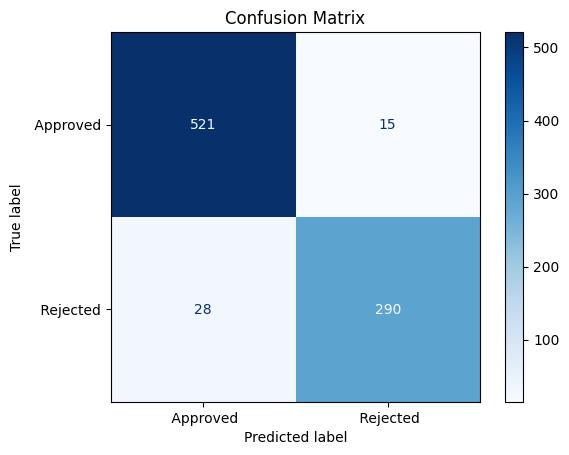

In [18]:
# Realizando mais algumas importações necessárias 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Previsões no conjunto de teste
y_pred = modelo.predict(X_teste_scaler)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()  # Converte as probabilidades em classes (0 ou 1)

# Criar a matriz de confusão
cm = confusion_matrix(y_teste, y_pred_classes)

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Testes com novos Dados 

### Nesta etapa, foram solicitados novos dados ao usuário. Esses dados foram enviados para a rede, que, então, pôde indicar se o empréstimo foi aprovado ou não.

## Perguntas pro usuário

In [1]:
# Simular perguntas ao usuário para coletar os dados necessários
no_of_dependents = int(input("Número de dependentes: "))

# Coletar a escolaridade como string e usar o mapeamento
education = input("Nível de escolaridade (Not Graduate, Graduate): ")
education = " " + education # adiciona espaco no inicio da string por conta do dataset 

# Coletar a informação se é autônomo como string e usar o mapeamento
self_employed = input("É autônomo (No, Yes): ")
self_employed = " " + self_employed # adiciona espaco no inicio da string por conta do dataset 

income_annum = float(input("Renda anual: "))
loan_amount = float(input("Valor do empréstimo: "))
loan_term = int(input("Prazo do empréstimo (em meses): "))
cibil_score = float(input("Pontuação de crédito (CIBIL): "))
residential_assets_value = float(input("Valor dos ativos residenciais: "))
commercial_assets_value = float(input("Valor dos ativos comerciais: "))
luxury_assets_value = float(input("Valor dos ativos de luxo: "))
bank_asset_value = float(input("Valor dos ativos bancários: "))

## Criando DataFrame

In [4]:
# Criar o dataframe com os dados fornecidos pelo usuário
novo_dado = pd.DataFrame([[no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, 
                           cibil_score, residential_assets_value, commercial_assets_value, 
                           luxury_assets_value, bank_asset_value]], 
                         columns=[' no_of_dependents', ' education', ' self_employed', ' income_annum', 
                                  ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', 
                                  ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value'])

## Pré-processamento do novo dado 
### Para realizar a codificação e a normalização dos dados fornecidos pelo usuário, foram utilizados os mesmos 'LabelEncoder' e 'StandardScaler' que foram empregados durante o treinamento.

In [21]:
# Transformar colunas categóricas com os encoders do treinamento 
novo_dado[' education'] = label_encoder_education.transform(novo_dado[' education'])
novo_dado[' self_employed'] = label_encoder_self_employed.transform(novo_dado[' self_employed'])

# Normalizar os dados numéricos usando o scaler do treinamento 
novo_dado_scaled = scaler.transform(novo_dado)

## Previsão 

### Para realizar a previsão, assumiu-se que, se o valor for menor ou igual a 0.5, o empréstimo foi aprovado; caso contrário, ele foi negado. Isso ocorre porque o LabelEncoder atribuiu o valor 0 a 'Approved' e 1 a 'Rejected'.

In [23]:
# Fazer a previsão com o modelo
predicao = modelo.predict(novo_dado_scaled)

# Converter a previsão para "Aprovado" ou "Não Aprovado"
# logica inversa 
resultado = "Aprovado" if predicao[0][0] <= 0.5 else "Não Aprovado"

# Exibir o resultado
print("Com base nas informações fornecidas\nempréstimo requisitado foi:", resultado)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Com base nas informações fornecidas
empréstimo requisitado foi: Aprovado
